# **OBJECTIVE :**

The objective of this project was to perform data cleaning and exploratory data analysis (EDA) on the Titanic dataset from Kaggle. The goals included handling missing values, creating new features through feature engineering, and visualizing various patterns and trends within the data.

# **IMPORT PACKAGES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# **DATA LOADING**

In [2]:
# Load the dataset
titanic = pd.read_csv('train.csv')

# **UNDERSTANDING THE DATASET**

In [3]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Understand the dataset
print(titanic.info())
print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# **DATA CLEANING**

Handling Missing Values
The dataset contained missing values in several columns, which needed to be addressed:

Age: Filled missing values with the median age.

Embarked: Filled missing values with the most frequent embarkation point.

Cabin: Dropped the column due to a high percentage of missing values.

In [5]:
# Data Cleaning
# Handling missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(columns=['Cabin'], inplace=True)

# Remove duplicate rows
titanic.drop_duplicates(inplace=True)

# **EXPLORATORY DATA ANALYSIS**

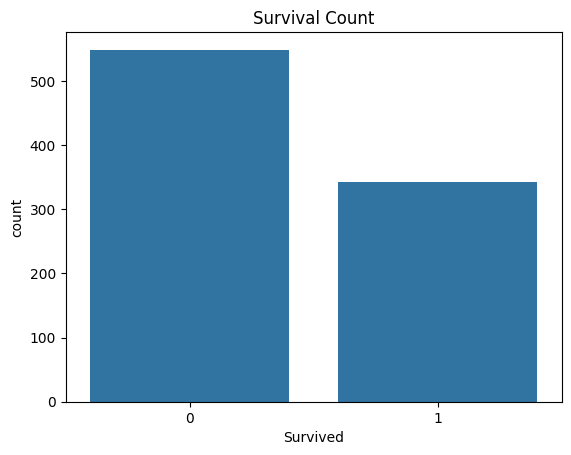

In [6]:
# Exploratory Data Analysis (EDA)
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

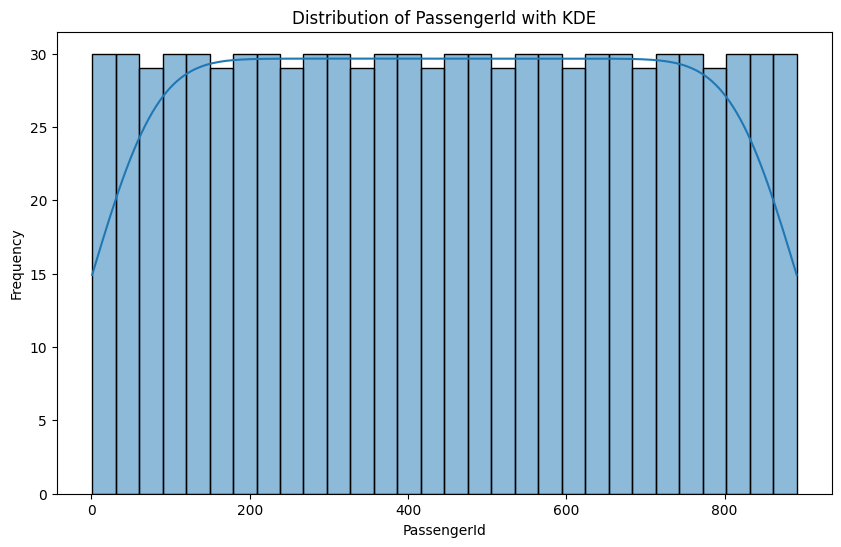

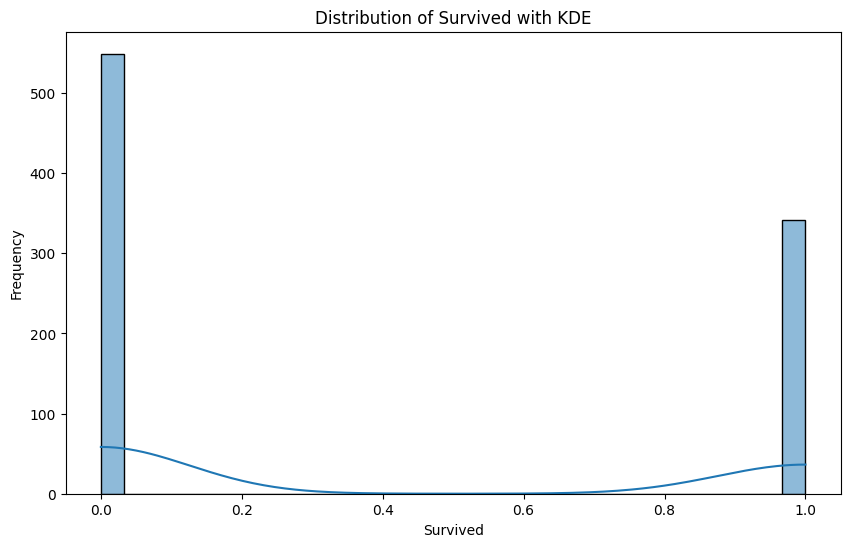

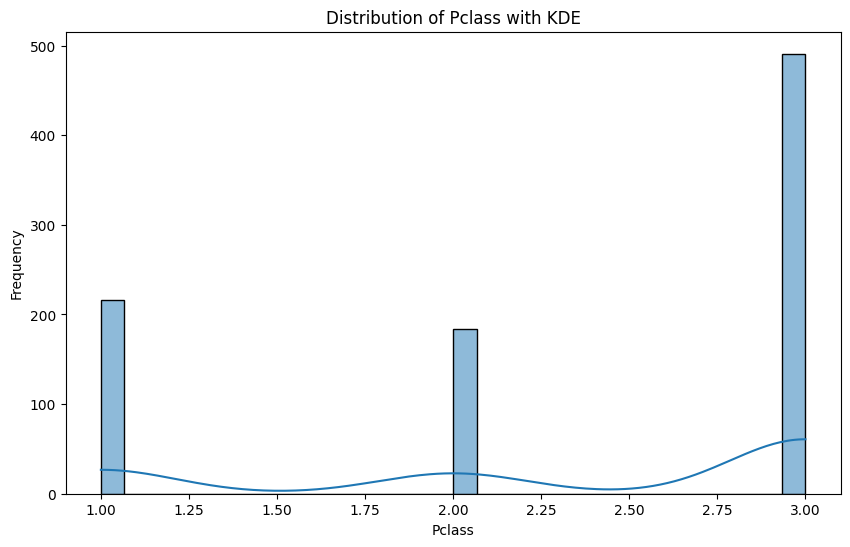

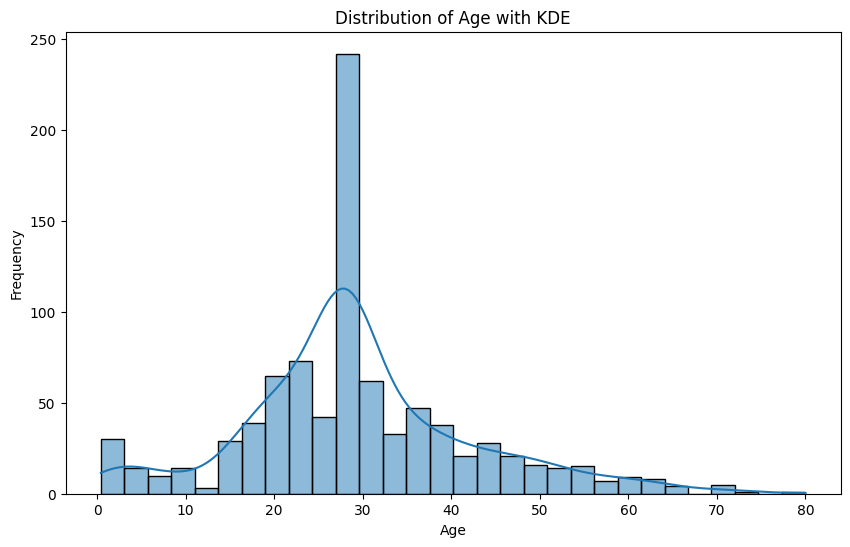

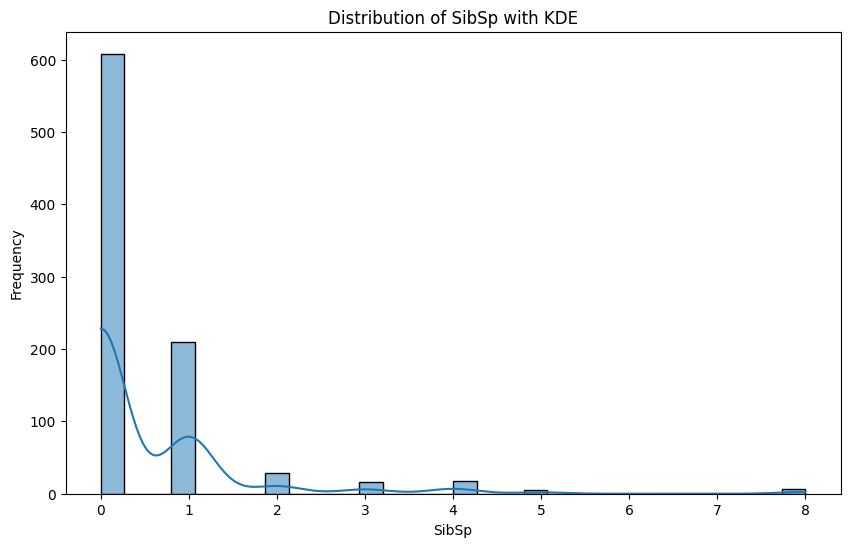

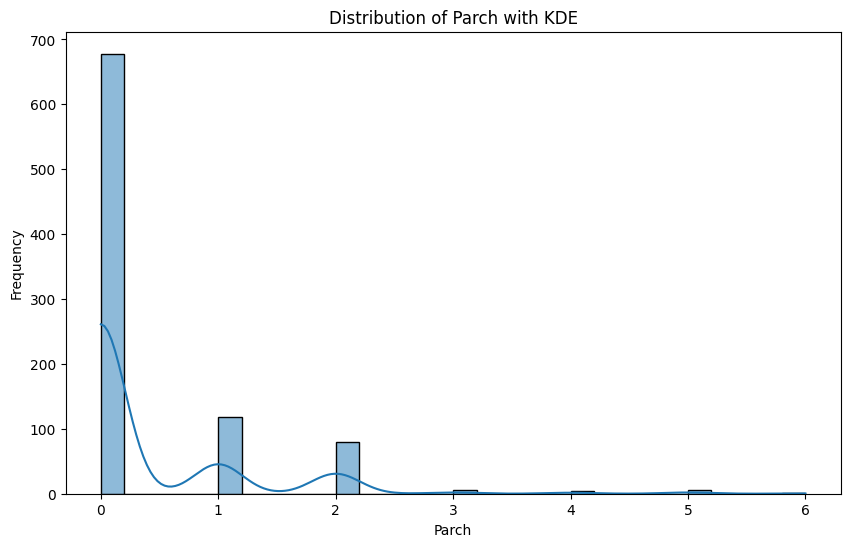

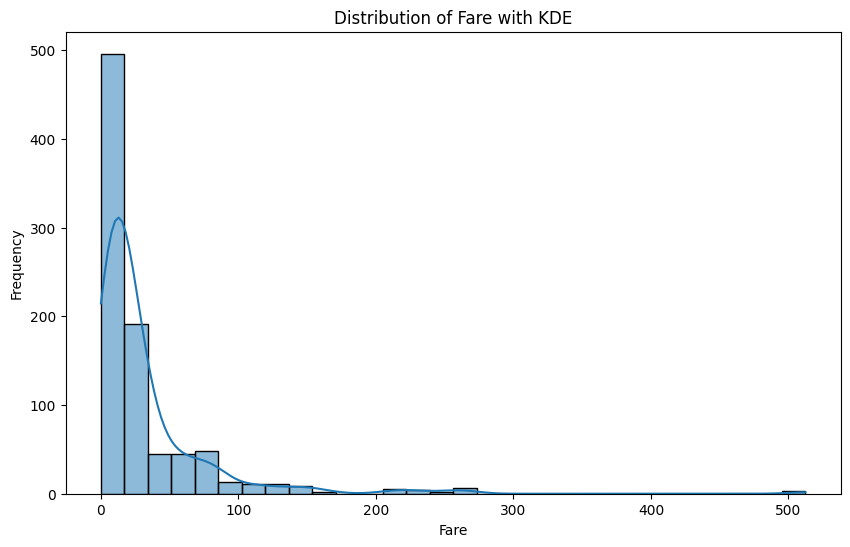

In [7]:
# Univariate Analysis - To understand each feature individually.
# Identify numerical features
numeric_features = titanic.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms with KDE for all numerical features
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(titanic[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} with KDE')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

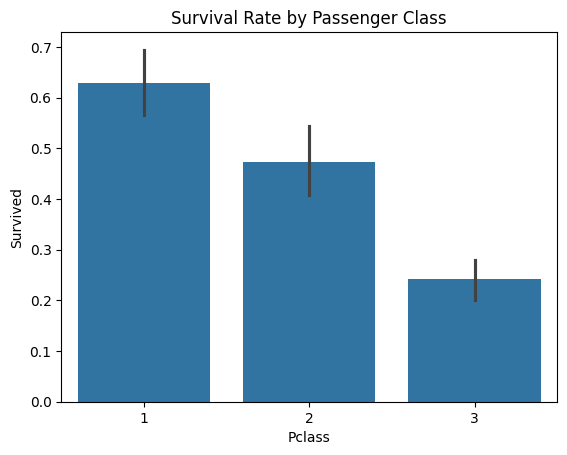

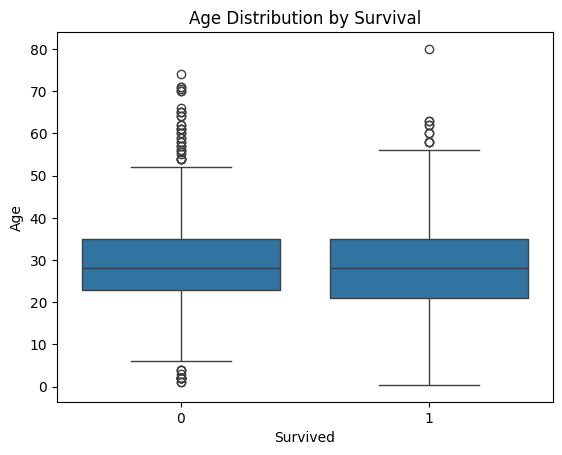

In [8]:
# Bivariate Analysis - explore the relationships between two features.
# Bivariate Analysis - Survived vs. Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Bivariate Analysis - Age vs. Survived
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age Distribution by Survival')
plt.show()

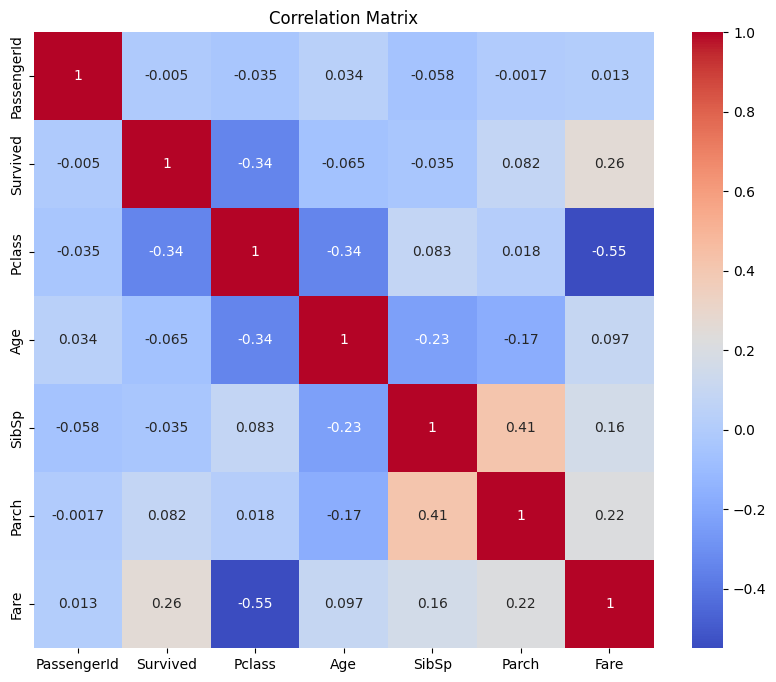

In [9]:
# Correlation Matrix (Exclude non-numeric columns)
numeric_features = titanic.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **FEATURE ENGINEERING**

**Create Family Size Feature**

We created a new feature representing the total family size by combining the number of siblings/spouses and parents/children:

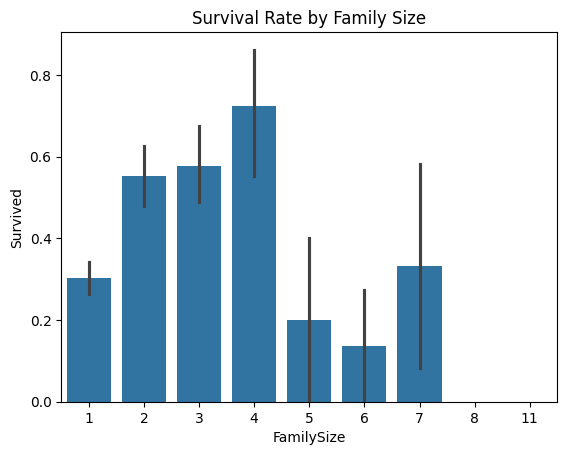

In [10]:
# Feature Engineering
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.show()

**Explanation:**

The 'FamilySize' feature was created by adding the number of siblings/spouses ('SibSp') and the number of parents/children ('Parch'), and then adding 1 to include the passenger themselves. This new feature provided insights into the family structure of the passengers.

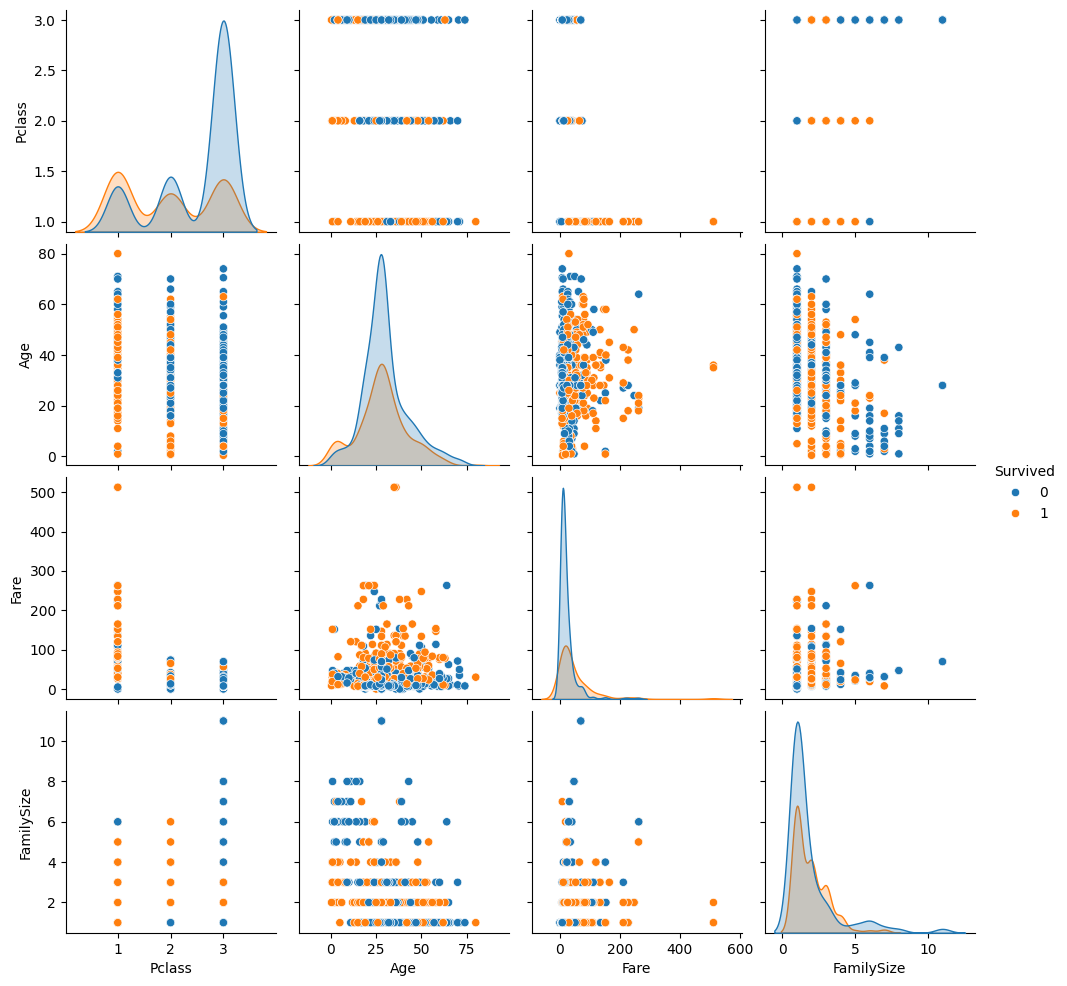

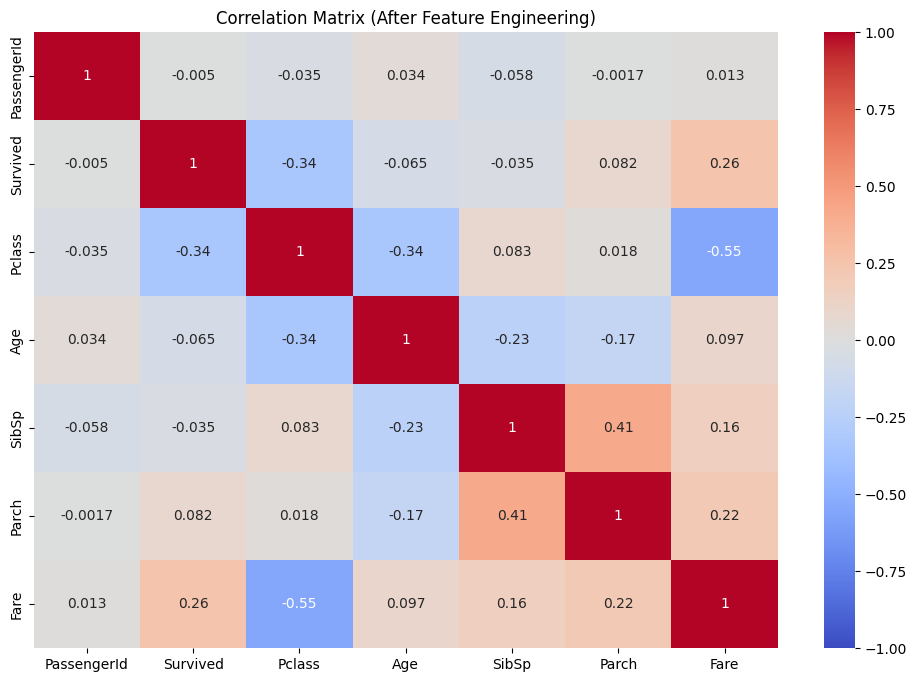

In [11]:
# Pair Plot
sns.pairplot(titanic[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived')
plt.show()

# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (After Feature Engineering)')
plt.show()

# **INTERACTIVE VISUALIZATIONS**

In [12]:
# Interactive scatter plot for Age vs. Fare
fig = px.scatter(titanic, x='Age', y='Fare', color='Survived', hover_data=['Name', 'Pclass', 'Sex'])
fig.update_layout(title='Age vs. Fare with Survival Status', xaxis_title='Age', yaxis_title='Fare')
fig.show()

# Interactive bar plot for Survival Rate by Passenger Class
fig = px.bar(titanic, x='Pclass', y='Survived', color='Survived', barmode='group', text='Survived')
fig.update_layout(title='Survival Rate by Passenger Class', xaxis_title='Passenger Class', yaxis_title='Survival Rate')
fig.show()